In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
path = os.getcwd()
path

'/home/adt/project/nuclearFuel/Zepeng'

In [2]:
# 导入处理好的数据
file_base_name = 'nuclear_burnup_data_20201215.csv'
file_input_name = 'df.csv'

pre_data_X = pd.read_csv(os.path.join(path, file_input_name), index_col=0)
pre_data_base = pd.read_csv(os.path.join(path, file_base_name))
pre_data_X.columns.values.tolist()  
pre_data_X

kinf_1   kinf_2   kinf_3   kinf_4  kinf_5  kinf_6   kinf_7  kinf_8  \
0       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
1       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
2       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
3       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
4       1.16708  1.08099  1.18090  1.16216  1.4279  1.1821  1.08632  1.4279   
...         ...      ...      ...      ...     ...     ...      ...     ...   
119995  1.15988  1.07458  1.09861  1.15534  1.4279  1.1821  1.07427  1.4279   
119996  1.09092  1.08161  1.07427  1.07583  1.4279  1.1821  1.09178  1.4279   
119997  1.09092  1.08161  1.07427  1.07583  1.4279  1.1821  1.09178  1.4279   
119998  1.19730  1.15417  1.21509  1.20422  1.4279  1.1821  1.06296  1.4279   
119999  1.06622  1.16655  1.20028  1.19485  1.4279  1.1821  1.15935  1.4279   

        kinf_9  kinf_10  ...  NODE2DBU_95  NODE2DBU_96  NODE2DBU_97  \
0       1.1821   1.1821  ...          0.0          0.0      36445.0   
1       1.1821   1.1821  ...          0.0          0.0      36809.0   
2       1.1821   1.1821  ...          0.0          0.0      31836.0   
3       1.1821   1.1821  ...          0.0          0.0      31803.0   
4       1.1821   1.1821  ...          0.0          0.0      26837.0   
...        ...      ...  ...          ...          ...          ...   
119995  1.1821   1.1821  ...          0.0          0.0      26191.0   
119996  1.1821   1.1821  ...          0.0          0.0      43151.0   
119997  1.1821   1.1821  ...          0.0          0.0      43091.0   
119998  1.1821   1.1821  ...          0.0          0.0      31803.0   
119999  1.1821   1.1821  ...          0.0          0.0      42090.0   

        NODE2DBU_98  NODE2DBU_99  NODE2DBU_100  NODE2DBU_101  NODE2DBU_102  \
0           31803.0      36809.0       31836.0       20806.0       20806.0   
1           36445.0      31836.0       31803.0       20806.0       20806.0   
2           36809.0      31803.0       36445.0       20806.0       20806.0   
3           31836.0      36445.0       36809.0       20806.0       20806.0   
4           26864.0      26834.0       26862.0       22008.0       22008.0   
...             ...          ...           ...           ...           ...   
119995      26191.0      26200.0       26200.0       36146.0       36146.0   
119996      45258.0      39658.0       43091.0       36186.0       36186.0   
119997      39658.0      45258.0       43151.0       36186.0       36186.0   
119998      31836.0      36445.0       36809.0       25238.0       25238.0   
119999      43835.0      39276.0       42082.0       21568.0       21568.0   

        NODE2DBU_103  NODE2DBU_104  
0            20806.0       20806.0  
1            20806.0       20806.0  
2            20806.0       20806.0  
3            20806.0       20806.0  
4            22008.0       22008.0  
...              ...           ...  
119995       36146.0       36146.0  
119996       36186.0       36186.0  
119997       36186.0       36186.0  
119998       25238.0       25238.0  
119999       21568.0       21568.0  

[120000 rows x 156 columns]

In [3]:
pre_data_y = pre_data_base.iloc[:,-2:]
pre_data_y

MaxAssBurnupCal  MaxPinBurnupCal
0                 56624          62467.5
1                 56812          61980.1
2                 56724          62521.4
3                 56537          62195.7
4                 57424          64025.7
...                 ...              ...
119995            57359          63599.1
119996            59562          64865.4
119997            59631          63716.2
119998            61714          65601.8
119999            61843          66948.3

[120000 rows x 2 columns]

In [4]:
pre_data = pd.concat([pre_data_X, pre_data_y], axis=1)


In [5]:
from sklearn.preprocessing import MinMaxScaler
pre_data_array = pre_data.values
mm = MinMaxScaler(feature_range=(0,1))
pre_data_Normalized = mm.fit_transform(pre_data_array)
pre_data_Normalized = pre_data_Normalized[:,:-2]
# pre_data_y = pre_data_Normalized[:,-2:]
print(pre_data_Normalized.shape)
print(pre_data_y.shape)

(120000, 156)
(120000, 2)


In [6]:
map1 = \
[
    [0,0,0,0,0,0,1,2,1,0,0,0,0,0,0],
    [0,0,0,0,3,4,5,6,5,4,3,0,0,0,0],
    [0,0,0,7,8,9,10,11,10,9,8,7,0,0,0],
    [0,0,7,12,13,14,15,16,15,14,13,12,7,0,0],
    [0,3,8,13,17,18,19,20,19,18,17,13,8,3,0],
    [0,4,9,14,18,21,22,23,22,21,18,14,9,4,0],
    [1,5,10,15,19,22,24,25,24,22,19,15,10,5,1],
    [2,6,11,16,20,23,25,26,25,23,20,16,11,6,2],
    [1,5,10,15,19,22,24,25,24,22,19,15,10,5,1],
    [0,4,9,14,18,21,22,23,22,21,18,14,9,4,0],
    [0,3,8,13,17,18,19,20,19,18,17,13,8,3,0],
    [0,0,7,12,13,14,15,16,15,14,13,12,7,0,0],
    [0,0,0,7,8,9,10,11,10,9,8,7,0,0,0],
    [0,0,0,0,3,4,5,6,5,4,3,0,0,0,0],
    [0,0,0,0,0,0,1,2,1,0,0,0,0,0,0]
    
]
m = np.array(map1)
print(m.shape)
map2 = \
[
    [0,0,0,0,0,0,0,0,0,0,0,0,"1/0",'1/1','2/0','2/1','1/1','1/0',0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,"1/2",'1/3','2/2','2/3','1/3','1/2',0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,"3/0",'3/1','4/0','4/1','5/0','5/1','6/0','6/1',"3/1",'3/0','4/1','4/0','5/1','5/0',0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,"3/2",'3/3','4/2','4/3','5/2','5/3','6/2','6/3',"3/3",'3/2','4/3','4/2','5/3','5/2',0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,'7/0','7/1',"8/0",'8/1','9/0','9/1','10/0','10/1','11/0','11/1',"10/1",'10/0','9/1','9/0','8/1','8/0','7/1','7/0',0,0,0,0,0,0],
    [0,0,0,0,0,0,'7/2','7/3',"8/2",'8/3','9/2','9/3','10/2','10/3','11/2','11/3',"10/3",'10/2','9/3','9/2','8/3','8/2','7/3','7/2',0,0,0,0,0,0],
    [0,0,0,0,'7/0','7/2','12/0','12/1',"13/0",'13/1','14/0','14/1','15/0','15/1','16/0','16/1',"15/1",'15/0','14/1','14/0','13/1','13/0','12/1','12/0','7/2','7/0',0,0,0,0],
    [0,0,0,0,'7/1','7/3','12/2','12/3',"13/2",'13/3','14/2','14/3','15/2','15/3','16/2','16/3',"15/3",'15/2','14/3','14/2','13/3','13/2','12/3','12/2','7/3','7/1',0,0,0,0],
    [0,0,"3/0","3/2",'8/0','8/2','13/0','13/2',"17/0",'17/1','18/0','18/1','19/0','19/1','20/0','20/1',"19/1",'19/0','18/1','18/0','17/1','17/0','13/2','13/0','8/2','8/0','3/2','3/0',0,0],
    [0,0,"3/1","3/3",'8/1','8/3','13/1','13/3',"17/2",'17/3','18/2','18/3','19/2','19/3','20/2','20/3',"19/3",'19/2','18/3','18/2','17/3','17/2','13/3','13/1','8/3','8/1','3/3','3/1',0,0],
    [0,0,"4/0","4/2",'9/0','9/2','14/0','14/2',"18/0",'18/2','21/0','21/1','22/0','22/1','23/0','23/1',"22/1",'22/0','21/1','21/0','18/2','18/0','14/2','14/0','9/2','9/0','4/2','4/0',0,0],
    [0,0,"4/1","4/3",'9/1','9/3','14/1','14/3',"18/1",'18/3','21/2','21/3','22/2','22/3','23/2','23/3',"22/3",'22/2','21/3','21/2','18/3','18/1','14/3','14/1','9/3','9/1','4/3','4/1',0,0],
    ['1/0','1/2',"5/0","5/2",'10/0','10/2','15/0','15/2',"19/0",'19/2','22/0','22/2','24/0','24/1','25/0','25/1',"24/1",'24/0','22/2','22/0','19/2','19/0','15/2','15/0','10/2','10/0','5/2','5/0','1/2','1/0'],
    ['1/1','1/3',"5/1","5/3",'10/1','10/3','15/1','15/3',"19/1",'19/3','22/1','22/3','24/2','24/3','25/2','25/3',"24/3",'24/2','22/3','22/1','19/3','19/1','15/3','15/1','10/3','10/1','5/3','5/1','1/3','1/1'],
    ['2/0','2/2',"6/0","6/2",'11/0','11/2','16/0','16/2',"20/0",'20/2','23/0','23/2','25/0','25/2','26/0','26/1',"25/2",'25/0','23/2','23/0','20/2','20/0','16/2','16/0','11/2','11/0','6/2','6/0','2/2','2/0'],
    ['2/1','2/3',"6/1","6/3",'11/1','11/3','16/1','16/3',"20/1",'20/3','23/1','23/3','25/1','25/3','26/2','26/3',"25/3",'25/1','23/3','23/1','20/3','20/1','16/3','16/1','11/3','11/1','6/3','6/1','2/3','2/1'],
    ['1/1','1/3',"5/1","5/3",'10/1','10/3','15/1','15/3',"19/1",'19/3','22/1','22/3','24/2','24/3','25/2','25/3',"24/3",'24/2','22/3','22/1','19/3','19/1','15/3','15/1','10/3','10/1','5/3','5/1','1/3','1/1'],
    ['1/0','1/2',"5/0","5/2",'10/0','10/2','15/0','15/2',"19/0",'19/2','22/0','22/2','24/0','24/1','25/0','25/1',"24/1",'24/0','22/2','22/0','19/2','19/0','15/2','15/0','10/2','10/0','5/2','5/0','1/2','1/0'],
    [0,0,"4/1","4/3",'9/1','9/3','14/1','14/3',"18/1",'18/3','21/2','21/3','22/2','22/3','23/2','23/3',"22/3",'22/2','21/3','21/2','18/3','18/1','14/3','14/1','9/3','9/1','4/3','4/1',0,0],
    [0,0,"4/0","4/2",'9/0','9/2','14/0','14/2',"18/0",'18/2','21/0','21/1','22/0','22/1','23/0','23/1',"22/1",'22/0','21/1','21/0','18/2','18/0','14/2','14/0','9/2','9/0','4/2','4/0',0,0],
    [0,0,"3/1","3/3",'8/1','8/3','13/1','13/3',"17/2",'17/3','18/2','18/3','19/2','19/3','20/2','20/3',"19/3",'19/2','18/3','18/2','17/3','17/2','13/3','13/1','8/3','8/1','3/3','3/1',0,0],
    [0,0,"3/0","3/2",'8/0','8/2','13/0','13/2',"17/0",'17/1','18/0','18/1','19/0','19/1','20/0','20/1',"19/1",'19/0','18/1','18/0','17/1','17/0','13/2','13/0','8/2','8/0','3/2','3/0',0,0],
    [0,0,0,0,'7/1','7/3','12/2','12/3',"13/2",'13/3','14/2','14/3','15/2','15/3','16/2','16/3',"15/3",'15/2','14/3','14/2','13/3','13/2','12/3','12/2','7/3','7/1',0,0,0,0],
    [0,0,0,0,'7/0','7/2','12/0','12/1',"13/0",'13/1','14/0','14/1','15/0','15/1','16/0','16/1',"15/1",'15/0','14/1','14/0','13/1','13/0','12/1','12/0','7/2','7/0',0,0,0,0],
    [0,0,0,0,0,0,'7/2','7/3',"8/2",'8/3','9/2','9/3','10/2','10/3','11/2','11/3',"10/3",'10/2','9/3','9/2','8/3','8/2','7/3','7/2',0,0,0,0,0,0],
    [0,0,0,0,0,0,'7/0','7/1',"8/0",'8/1','9/0','9/1','10/0','10/1','11/0','11/1',"10/1",'10/0','9/1','9/0','8/1','8/0','7/1','7/0',0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,"3/2",'3/3','4/2','4/3','5/2','5/3','6/2','6/3',"3/3",'3/2','4/3','4/2','5/3','5/2',0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,"3/0",'3/1','4/0','4/1','5/0','5/1','6/0','6/1',"3/1",'3/0','4/1','4/0','5/1','5/0',0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,"1/2",'1/3','2/2','2/3','1/3','1/2',0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,"1/0",'1/1','2/0','2/1','1/1','1/0',0,0,0,0,0,0,0,0,0,0,0,0],
      
]
m = np.array(map2)
print(m.shape)

(15, 15)
(30, 30)


In [9]:
def search(a,alist):
    res = []
    for i in range(len(alist)):
        for j in range(len(alist[i])):
            if alist[i][j] == a:
                res.append((i,j))
    return res

In [10]:
#排布input
def search(a,alist):
    res = []
    for i in range(len(alist)):
        for j in range(len(alist[i])):
            if alist[i][j] == a:
                res.append((i,j))
    return res
new = []
for i,item in enumerate(pre_data_Normalized):
    print("正在处理第 "+str(i)+' 个图像..')
    layer1 = [[0 for _ in range(15)] for _ in range(15)]
    layer2 = [[0 for _ in range(15)] for _ in range(15)]
    layer3 = [[0 for _ in range(30)] for _ in range(30)]
#     print(item)
    for j in range(item.size): #len = 156
        if j < 26:
            res = search(j+1,map1)
            for u in res:
                h,w = u[0],u[1]
                layer1[h][w] = item[j]
        elif j < 52:
            j_ = j-26
            res = search(j_+1,map1)
            for u in res:
                h,w = u[0],u[1]
                layer2[h][w] = item[j]
            
        else:
            j_ = j-52
            number = str(j_ // 4 + 1)
            corner = str(j_ % 4)
            number_corner = number + '/' + corner
            res = search(number_corner,map2)
            for u in res:
                h,w = u[0],u[1]
                layer3[h][w] = item[j]
    layer1_array = np.array(layer1)
    layer2_array = np.array(layer2)
    layer3_array = np.array(layer3)
    
    #从1*1扩展成2*2
    layer1_array = np.repeat(layer1_array,2,axis = 1) 
    layer1_array = np.repeat(layer1_array,2,axis = 0)
    layer2_array = np.repeat(layer2_array,2,axis = 1)
    layer2_array = np.repeat(layer2_array,2,axis = 0)
    
    #channel 拼接
    tmp = np.stack((layer1_array,layer2_array,layer3_array),axis = 2)
    new.append(tmp)

pre_data_x = np.array(new)
print(pre_data_x.shape)
       

正在处理第 0 个图像..
正在处理第 1 个图像..
正在处理第 2 个图像..
正在处理第 3 个图像..
正在处理第 4 个图像..
正在处理第 5 个图像..
正在处理第 6 个图像..
正在处理第 7 个图像..
正在处理第 8 个图像..
正在处理第 9 个图像..
正在处理第 10 个图像..
正在处理第 11 个图像..
正在处理第 12 个图像..
正在处理第 13 个图像..
正在处理第 14 个图像..
正在处理第 15 个图像..
正在处理第 16 个图像..
正在处理第 17 个图像..
正在处理第 18 个图像..
正在处理第 19 个图像..
正在处理第 20 个图像..
正在处理第 21 个图像..
正在处理第 22 个图像..
正在处理第 23 个图像..
正在处理第 24 个图像..
正在处理第 25 个图像..
正在处理第 26 个图像..
正在处理第 27 个图像..
正在处理第 28 个图像..
正在处理第 29 个图像..
正在处理第 30 个图像..
正在处理第 31 个图像..
正在处理第 32 个图像..
正在处理第 33 个图像..
正在处理第 34 个图像..
正在处理第 35 个图像..
正在处理第 36 个图像..
正在处理第 37 个图像..
正在处理第 38 个图像..
正在处理第 39 个图像..
正在处理第 40 个图像..
正在处理第 41 个图像..
正在处理第 42 个图像..
正在处理第 43 个图像..
正在处理第 44 个图像..
正在处理第 45 个图像..
正在处理第 46 个图像..
正在处理第 47 个图像..
正在处理第 48 个图像..
正在处理第 49 个图像..
正在处理第 50 个图像..
正在处理第 51 个图像..
正在处理第 52 个图像..
正在处理第 53 个图像..
正在处理第 54 个图像..
正在处理第 55 个图像..
正在处理第 56 个图像..
正在处理第 57 个图像..
正在处理第 58 个图像..
正在处理第 59 个图像..
正在处理第 60 个图像..
正在处理第 61 个图像..
正在处理第 62 个图像..
正在处理第 63 个图像..
正在处理第 64 个图像..
正在处理第 65 个图像..
正在处理第 66 个图像..
正在处理第

In [11]:
l = [1,"a"]
l

[1, 'a']

In [12]:
# pre_data_x = pre_data_x.reshape((pre_data_x.shape[0], pre_data_x.shape[1], pre_data_x.shape[2], 1))
# print(pre_data_x.shape)

In [13]:
print(pre_data_x.shape)
print(pre_data_y.shape)
pre_data_y = np.array(pre_data_y)
data = (pre_data_x,pre_data_y)
# pre_data_y.type

(120000, 30, 30, 3)
(120000, 2)


In [14]:
!nvidia-smi

Tue Jan 12 21:26:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 440.82       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2070    Off  | 00000000:17:00.0 Off |                  N/A |
| 29%   34C    P8     8W / 175W |   1116MiB /  7982MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [15]:
# from keras.applications.resnet18 import ResNet18
# from keras.applications.resnet18 import preprocess_input as preprocess_input_resnet
import keras
def deeper_conv2D(h,w):
    new_model = keras.Sequential()
    new_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), strides=(2,2), padding="same", activation="relu", \
                                         input_shape=(h, w, 3)))
    new_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
    new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
    # Flatten will take our convolution filters and lay them out end to end so our dense layer can predict based on the outcomes of each
    new_model.add(tf.keras.layers.Flatten())
    new_model.add(tf.keras.layers.Dense(1000, activation='relu'))
    new_model.add(tf.keras.layers.Dense(100))
    new_model.add(tf.keras.layers.Dense(1))
    new_model.compile(optimizer="adam", loss="mean_squared_error")    
    return new_model
m = deeper_conv2D(pre_data_x.shape[1],pre_data_x.shape[2])
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 15, 16)        208       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 32)        2080      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        8256      
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense (Dense)                (None, 1000)              14401000  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split
seed = 2020
x_pre_train, x_test, y_pre_train, y_test = train_test_split(pre_data_x, pre_data_y, 
                                                           random_state=seed, train_size=0.9, 
                                                           test_size=0.1)

In [17]:
model = m.fit(x_pre_train,  y_pre_train[:,1], epochs=150)

Epoch 1/150
3375/3375 [==============================] - 301s 89ms/step - loss: 33388334.0000
Epoch 2/150
3375/3375 [==============================] - 302s 89ms/step - loss: 2476063.0000
Epoch 3/150
3375/3375 [==============================] - 302s 90ms/step - loss: 2002909.1250
Epoch 4/150
3375/3375 [==============================] - 300s 89ms/step - loss: 1702959.7500
Epoch 5/150
3375/3375 [==============================] - 300s 89ms/step - loss: 1578371.1250
Epoch 6/150
3375/3375 [==============================] - 301s 89ms/step - loss: 1428888.3750
Epoch 7/150
3375/3375 [==============================] - 301s 89ms/step - loss: 1388182.3750
Epoch 8/150
3375/3375 [==============================] - 300s 89ms/step - loss: 1297267.5000
Epoch 9/150
3375/3375 [==============================] - 302s 89ms/step - loss: 1235615.1250
Epoch 10/150
3375/3375 [==============================] - 301s 89ms/step - loss: 1215483.8750
Epoch 11/150
3375/3375 [==============================] - 300s 89ms/

In [25]:
y_test[:,1]
# array([57732., 49679., 54567., ..., 57982., 57080., 56720.])

array([63664.2, 53156.4, 60857.7, ..., 63355. , 63106.4, 62843.1])

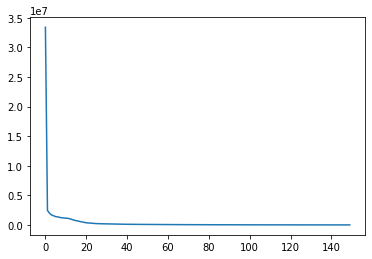

In [19]:
plt.plot(model.history["loss"])

In [20]:
# m.evaluate(x_test, y_test, verbose=0)

In [26]:
output_col = ['v']
columns=output_col
pred_test = m.predict(x_test)
pred_test = pd.DataFrame(pred_test,columns=output_col)
y_test = pd.DataFrame(y_test[:,1],columns=output_col)
y_test

v
0      63664.2
1      53156.4
2      60857.7
3      63804.1
4      66056.1
...        ...
11995  63212.1
11996  63966.7
11997  63355.0
11998  63106.4
11999  62843.1

[12000 rows x 1 columns]

In [28]:
print("MaxPinBurnupCal")
print("")
def CalError(pred, test):
    
    col_name = []
    for col in pred.columns:
        col_name.append(col+'_pred')
    for col in test.columns:
        col_name.append(col+'_test')  
    
    pred.index = test.index
    pred_error = pd.concat([pred,test], axis=1)
    print(pred_error)
    pred_error.columns = col_name
    
    error_col = []
    for col in pred.columns:
        pred_error[col + '_error'] = np.array(pred[col]) - np.array(test[col])
        error_col.append(col + '_error')
    bin_range = np.linspace(0,1000,11).tolist() + [2000, 3000, 4000, 5000, 10000]
    bin_label = np.linspace(1,15,15).tolist()
    
    range_col = []
    for col in error_col:
        pred_error[col+'_range'] = pd.cut(
                                        abs(np.array(pred_error[col])),
                                        bins=bin_range
                                        )
        range_col.append(col+'_range')
        pred_error[col+'_label'] = pd.cut(
                                        abs(np.array(pred_error[col])),
                                        bins=bin_range,
                                        labels=bin_label
                                        )
        range_col.append(col+'_label')
        
    for col in [c for c in range_col if '_label' not in c]:
        print('{}特征误差范围及统计个数'.format(col))
        print(pred_error[col].value_counts())
        
    return pred_error
        
pred_error = CalError(pred_test[output_col], y_test[output_col])
pred_error

MaxPinBurnupCal

                  v        v
0      63556.984375  63664.2
1      52851.238281  53156.4
2      60871.300781  60857.7
3      63868.890625  63804.1
4      65951.296875  66056.1
...             ...      ...
11995  62788.183594  63212.1
11996  63948.980469  63966.7
11997  63199.902344  63355.0
11998  62901.890625  63106.4
11999  62814.523438  62843.1

[12000 rows x 2 columns]
v_error_range特征误差范围及统计个数
(0.0, 100.0]         4267
(100.0, 200.0]       3603
(200.0, 300.0]       2132
(300.0, 400.0]       1015
(400.0, 500.0]        480
(500.0, 600.0]        211
(600.0, 700.0]        131
(700.0, 800.0]         71
(800.0, 900.0]         41
(1000.0, 2000.0]       32
(900.0, 1000.0]        17
(5000.0, 10000.0]       0
(4000.0, 5000.0]        0
(3000.0, 4000.0]        0
(2000.0, 3000.0]        0
Name: v_error_range, dtype: int64


v_pred   v_test     v_error   v_error_range v_error_label
0      63556.984375  63664.2 -107.215625  (100.0, 200.0]           2.0
1      52851.238281  53156.4 -305.161719  (300.0, 400.0]           4.0
2      60871.300781  60857.7   13.600781    (0.0, 100.0]           1.0
3      63868.890625  63804.1   64.790625    (0.0, 100.0]           1.0
4      65951.296875  66056.1 -104.803125  (100.0, 200.0]           2.0
...             ...      ...         ...             ...           ...
11995  62788.183594  63212.1 -423.916406  (400.0, 500.0]           5.0
11996  63948.980469  63966.7  -17.719531    (0.0, 100.0]           1.0
11997  63199.902344  63355.0 -155.097656  (100.0, 200.0]           2.0
11998  62901.890625  63106.4 -204.509375  (200.0, 300.0]           3.0
11999  62814.523438  62843.1  -28.576562    (0.0, 100.0]           1.0

[12000 rows x 5 columns]